# Лабораторная работа №4

## Аппроксимация граничных условий второго рода в методе конечных разностей на примере уравнения теплопроводности

## Явная и неявная разностые схемы

### 1. Явная схема

$$
\frac{\partial u}{\partial t} = \frac{u(x, t + \tau) - u(x, t)}{\tau}
$$

$$
\frac{\partial^2 u}{\partial x^2} = \frac{u(x+h, t) - 2u(x, t) + u(x-h, t)}{h^2}
$$

Тогда оператор $Lu$:

$$
Lu = \frac{u(x, t + \tau) - u(x, t)}{\tau} - \frac{u(x+h, t) - 2u(x, t) + u(x-h, t)}{h^2}
$$

Выразим $u(x, t + \tau)$:

$$
u(x, t + \tau) = u(x, t) + \tau(\frac{u(x + h, t)}{h^2} - 2 \frac{u(x, t)}{h^2} + \frac{u(x-h, t)}{h^2})
$$

Приведём слагаемые:

$$
u(x, t + \tau) = \frac{\tau}{h^2}u(x-h,t) + (1 - \frac{2\tau}{h^2})u(x,t) + \frac{\tau}{h^2}u(x+h, t)
$$ 


### 2. Неявная схема

$$
\frac{\partial u}{\partial t} = \frac{u(x, t + \tau) - u(x, t)}{\tau}
$$

$$
\frac{\partial^2 u}{\partial x^2} = \frac{u(x+h, t + \tau) - 2u(x, t + \tau) + u(x-h, t + \tau)}{h^2}
$$

Тогда оператор $Lu$:

$$
Lu = \frac{u(x, t + \tau) - u(x, t)}{\tau} - \frac{u(x+h, t+\tau) - 2u(x, t+\tau) + u(x-h, t+\tau)}{h^2}
$$

Выразим $u(x, t)$:

$$
u(x, t) = u(x, t + \tau) - \tau(\frac{u(x + h, t+\tau)}{h^2} + 2 \frac{u(x, t+\tau)}{h^2} - \frac{u(x-h, t+\tau)}{h^2})
$$

Приведём слагаемые:

$$
u(x, t) = -\frac{\tau}{h^2}u(x-h,t+\tau) + (1 + \frac{2\tau}{h^2})u(x,t+\tau) - \frac{\tau}{h^2}u(x+h, t+\tau)
$$

## Способы реализации ГУ второго рода:

### 1. Аппроксимация производной по х левой разностью

В данном способе правое краевое условие аппроксимируется по формуле:

$$
\frac{\partial T}{\partial x} = \frac{T_N^n - T_{n-1}^n}{h}
$$

Тогда:

$$
T_N^n = h\cdot g_2(t) + T_{N-1}^n
$$

**Порядок аппроксимации: O(h).**

### 2. Аппроксимация производной по х центральной  разностью:

В данном способе правое граничное условие аппроксимируется по обычной формуле при помощи добавления фиктивных узлов. 

Аппроксимируем граничное условие следующим образом:

$$
\frac{\partial T}{\partial x} = \frac{T_{N + 1}^n - T_{N-1}^n}{2h}
$$

Отсюда выразим фиктивный узел:

$$
T_{N+1}^n = 2h\cdot g_2(t) + T_{N-1}^n
$$

Значение которого затем подставим в исходную формулу.

**Порядок аппроксимации: O($h^2$).**

### Задача:

**Найти приближенное решение начально-краевой задачи для уравнения теплопроводности:**

$$\begin{cases} 
   \frac {du}{dt}= k \cdot \frac {d^2u}{dx^2} + f(x, t), 0 < t \leq T, \quad a < x < b\\
   u(a, t) = g_1(t), \frac {du}{dt}(b, t) = g_2(t), \qquad \ 0 < t \leq T\\
   u(x, 0) = \varphi(x), \qquad \qquad \qquad \quad \; \; \; a \leq x \leq b
\end{cases}$$

In [1]:
from prettytable import PrettyTable
import numpy as np
import matplotlib.pyplot as plt

a = 0
b = 2
k = 1
T = 0.2

x_num_default = 50
h_default = (b - a) / x_num_default
x_list_default = np.linspace(a, b, x_num_default)

tau_default = 0.5 * (h_default**2 / k)
t_num_default = int(T / tau_default)
t_list_default = np.linspace(0, T, t_num_default)

phi = lambda x: 0
g1 = lambda t: 0
g2 = lambda t: 0
f = lambda x, t: x

In [2]:
def explicit(method, h, tau):
    x_num = int((b - a) / h)
    x_list = np.linspace(a, b, x_num)
    t_num = int(T / tau)
    t_list = np.linspace(0, T, t_num)

    M = np.zeros((t_num, x_num))
    M[0, :] = [phi(x_i) for x_i in x_list]
    M[:, 0] = [g1(t_i) for t_i in t_list]

    for i in range(1, t_num):
        for j in range(1, x_num - 1):
            M[i, j] = tau * M[i - 1, j - 1] / h ** 2 + (1 - 2 * tau / h ** 2) * M[i - 1, j] + \
                      tau / h ** 2 * M[i - 1, j + 1] + tau * f(x_list[j], t_list[i - 1])

        M[i, -1] = g2(t_list[i]) * h + M[i, -2] if method == 1 else \
            tau * M[i - 1, -2] / h ** 2 + (1 - 2 * tau / h ** 2) * M[i - 1, -1] + \
            tau / h ** 2 * (2 * h * g2(t_list[i]) + M[i, -2]) + tau * f(x_list[-1], t_list[i - 1])
    return M


def implicit(method, h, tau):
    t_num = int(T / tau)
    t_list = np.linspace(0, T, t_num)
    x_num = int((b - a) / h)
    x_list = np.linspace(a, b, x_num)

    M = np.zeros((t_num, x_num), dtype=np.float)
    M[0, :] = [phi(x) for x in x_list]

    for i in range(1, t_num):
        U, V = (np.zeros((x_num, x_num)), np.zeros(x_num)) if method == 1 else \
            (np.zeros((x_num+1, x_num+1)), np.zeros(x_num+1))
        for j in range(1, V.shape[0] - 1):
            U[j, j-1:j+2] = -k / h ** 2, 1 / tau + 2 * k / h ** 2, -k / h ** 2

        U[0, 0] = 1
        U[-1, -1] = 1
        U[-1, -2 if method == 1 else -3] = -1

        V[0] = g1(x_list[0])
        for j in range(1, V.shape[0] - 1):
            V[j] = f(x_list[j], t_list[i]) + M[i - 1, j] / tau

        V[-1], M[i] = (h * g2(t_list[i]), np.linalg.solve(U, V)) if method == 1 else \
            (2 * h * g2(t_list[i]), np.linalg.solve(U, V)[:-1])

    return M


def draw_plot(M, num, title):
    t_selection = np.linspace(0, t_num_default - 1, num)
    for t in t_selection:
        plt.plot(x_list_default, M[int(t)])
    plt.title(title)
    plt.grid()
    plt.show()
    
    
def table_for_fixed_h(scheme, method, h, tau, n=5, precision=8):
    x_num = int((b - a) / h)
    t_num = int(T / tau)
    t_list = np.linspace(0, T, t_num)

    tn_1_index, tn_2_index = np.random.randint(0, t_num-1, size=2)
    tn_1, tn_2 = t_list[tn_1_index], t_list[tn_2_index]
    print("tn1 = %f, tn2 = %.8f " % (tn_1, tn_2))
    table = PrettyTable()
    table.field_names = ['N', 'τ', 's(tn1)', 's(tn2)', 'max(t1)', 'max(t2)']
    for i in range(0, n):
        tn_1_index, tn_2_index = int(tn_1 / tau), int(tn_2 / tau)

        M_1 = np.matrix('0')
        M_2 = np.matrix('0')
        if scheme == 1:
            M_1 = explicit(method, h, tau)
            M_2 = explicit(method, h, tau / 2)
        elif scheme == 2:
            M_1 = implicit(method, h, tau)
            M_2 = implicit(method, h, tau / 2)

        diff_tn_1, diff_tn_2 = M_1[tn_1_index] - M_2[2 * tn_1_index], M_1[tn_2_index] - M_2[2 * tn_2_index]
        std_tn_1, std_tn_2 = diff_tn_1.std(), diff_tn_2.std()
        max_tn_1, max_tn_2 = max(diff_tn_1), max(diff_tn_2)
        table.add_row([x_num, tau, round(std_tn_1, precision), round(std_tn_2, precision),
                       round(max_tn_1, precision), round(max_tn_2, precision)])
        tau /= 2
    print(table)


def table_for_fixed_tau(scheme, method, h, tau, n=5, precision=8):
    t_num = int(T / tau)
    t_list = np.linspace(0, T, t_num)
    x_num = int((b - a) / h)

    tn_1_index, tn_2_index = np.random.randint(0, t_num-1, size=2)
    tn_1, tn_2 = t_list[tn_1_index], t_list[tn_2_index]
    print("tn1 = %f, tn2 = %.8f " % (tn_1, tn_2))

    table = PrettyTable()
    table.field_names = ['N', 'h', 's(tn1)', 's(tn2)', 'max(t1)', 'max(t2)']
    for i in range(0, n):
        tn_1_index, tn_2_index = int(tn_1 / tau), int(tn_2 / tau)

        M_1 = np.matrix('0')
        M_2 = np.matrix('0')
        if scheme == 1:
            M_1 = explicit(method, h, tau)
            M_2 = explicit(method, h / 2, tau)
        elif scheme == 2:
            M_1 = implicit(method, h, tau)
            M_2 = implicit(method, h / 2, tau)

        diff_tn_1, diff_tn_2 = M_1[tn_1_index] - M_2[tn_1_index, 1::2], M_1[tn_2_index] - M_2[tn_2_index, 1::2]
        std_tn_1, std_tn_2 = diff_tn_1.std(), diff_tn_2.std()
        max_tn_1, max_tn_2 = max(diff_tn_1), max(diff_tn_2)
        table.add_row([x_num, h, round(std_tn_1, precision), round(std_tn_2, precision),
                       round(max_tn_1, precision), round(max_tn_2, precision)])
        h /= 2
        x_num = int((b - a) / h)
    print(table)

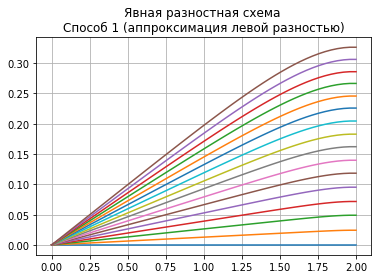

tn1 = 0.016867, tn2 = 0.06104418 
+----+--------+----------+----------+----------+-----------+
| N  |   τ    |  s(tn1)  |  s(tn2)  | max(t1)  |  max(t2)  |
+----+--------+----------+----------+----------+-----------+
| 50 | 0.0008 | 4.34e-06 | 9.76e-06 | 1.5e-05  | 2.842e-05 |
| 50 | 0.0004 | 2.16e-06 | 4.87e-06 | 7.46e-06 | 1.419e-05 |
| 50 | 0.0002 | 1.08e-06 | 2.44e-06 | 3.72e-06 |  7.1e-06  |
| 50 | 0.0001 | 5.4e-07  | 1.22e-06 | 1.86e-06 |  3.55e-06 |
| 50 | 5e-05  | 2.7e-07  | 6.1e-07  | 9.3e-07  |  1.77e-06 |
+----+--------+----------+----------+----------+-----------+
tn1 = 0.041206, tn2 = 0.02512563 
+----+---------+------------------------+------------------------+-----------------------+------------------------+
| N  |    h    |         s(tn1)         |         s(tn2)         |        max(t1)        |        max(t2)         |
+----+---------+------------------------+------------------------+-----------------------+------------------------+
| 4  |   0.5   |       0.00348421  

In [7]:
M = explicit(1, h_default, tau_default)
draw_plot(M, 16, "Явная разностная схема \nСпособ 1 (аппроксимация левой разностью)")
table_for_fixed_h(1, 1, h_default, h_default**2/2)
table_for_fixed_tau(1, 1, 0.5, 0.001)

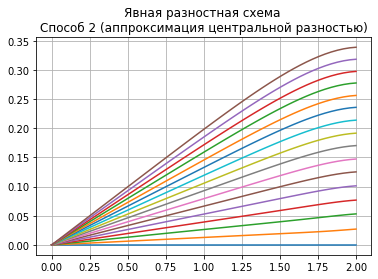

tn1 = 0.032932, tn2 = 0.11646586 
+----+--------+------------+------------+------------+------------+
| N  |   τ    |   s(tn1)   |   s(tn2)   |  max(t1)   |  max(t2)   |
+----+--------+------------+------------+------------+------------+
| 50 | 0.0008 | 0.0004435  | 0.00090225 | 0.00202158 | 0.00340588 |
| 50 | 0.0004 | 0.00021366 | 0.00044303 | 0.00097701 | 0.00167482 |
| 50 | 0.0002 | 0.00010487 | 0.00021933 | 0.00048029 | 0.0008299  |
| 50 | 0.0001 | 5.205e-05  | 0.00010912 | 0.00023845 | 0.00041309 |
| 50 | 5e-05  | 2.591e-05  | 5.444e-05  | 0.00011872 | 0.00020611 |
+----+--------+------------+------------+------------+------------+
tn1 = 0.084422, tn2 = 0.18793970 
+----+---------+-----------------------+------------------------+------------------------+-------------------------+
| N  |    h    |         s(tn1)        |         s(tn2)         |        max(t1)         |         max(t2)         |
+----+---------+-----------------------+------------------------+---------------------

In [4]:
    M = explicit(2, h_default, tau_default)
    draw_plot(M, 16, "Явная разностная схема \nСпособ 2 (аппроксимация центральной разностью)")
    table_for_fixed_h(1, 2, h_default, h_default**2/2)
    table_for_fixed_tau(1, 2, 0.5, 0.001)

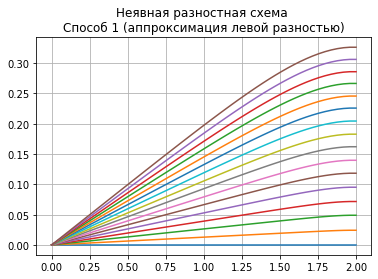

tn1 = 0.072581, tn2 = 0.16290323 
+----+--------+-------------+-------------+---------+---------+
| N  |   τ    |    s(tn1)   |    s(tn2)   | max(t1) | max(t2) |
+----+--------+-------------+-------------+---------+---------+
| 50 | 0.0016 | 2.14106e-05 | 3.33404e-05 |   0.0   |   -0.0  |
| 50 | 0.0008 | 1.07378e-05 | 1.67382e-05 |   -0.0  |   -0.0  |
| 50 | 0.0004 |  5.3948e-06 |  8.3861e-06 |   0.0   |   0.0   |
| 50 | 0.0002 |  2.6995e-06 |  4.1948e-06 |   0.0   |   0.0   |
| 50 | 0.0001 |  1.3514e-06 |  2.0985e-06 |   0.0   |   -0.0  |
+----+--------+-------------+-------------+---------+---------+
tn1 = 0.157895, tn2 = 0.04210526 
+-----+---------+------------+------------+-------------+-------------+
|  N  |    h    |   s(tn1)   |   s(tn2)   |   max(t1)   |   max(t2)   |
+-----+---------+------------+------------+-------------+-------------+
|  20 |   0.1   | 0.00141778 | 0.00046641 | -0.00315376 | -0.00057915 |
|  40 |   0.05  | 0.00071534 | 0.00023367 | -0.00147464 | -0.0002630

In [5]:
    M = implicit(1, h_default, tau_default)
    draw_plot(M, 16, "Неявная разностная схема \nСпособ 1 (аппроксимация левой разностью)")
    table_for_fixed_h(2, 1, h_default, h_default**2, precision=10)
    table_for_fixed_tau(2, 1, 0.1, 0.01)

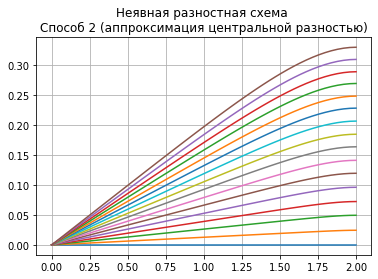

tn1 = 0.187097, tn2 = 0.02258065 
+----+--------+-------------+------------+---------+---------+
| N  |   τ    |    s(tn1)   |   s(tn2)   | max(t1) | max(t2) |
+----+--------+-------------+------------+---------+---------+
| 50 | 0.0016 | 3.52918e-05 | 9.8172e-06 |   -0.0  |   0.0   |
| 50 | 0.0008 | 1.77078e-05 | 4.9471e-06 |   0.0   |   -0.0  |
| 50 | 0.0004 |  8.8694e-06 | 2.4833e-06 |   0.0   |   0.0   |
| 50 | 0.0002 |  4.4386e-06 | 1.2442e-06 |   -0.0  |   0.0   |
| 50 | 0.0001 |  2.2197e-06 | 6.246e-07  |   0.0   |   0.0   |
+----+--------+-------------+------------+---------+---------+
tn1 = 0.052632, tn2 = 0.11578947 
+-----+---------+------------+------------+------------+-------------+
|  N  |    h    |   s(tn1)   |   s(tn2)   |  max(t1)   |   max(t2)   |
+-----+---------+------------+------------+------------+-------------+
|  20 |   0.1   | 0.00077376 | 0.00163272 | -5.19e-06  | -0.00040153 |
|  40 |   0.05  | 0.00036578 | 0.00077585 | -5.813e-05 | -0.00027922 |
|  80 |  0

In [6]:
    M = implicit(2, h_default, tau_default)
    draw_plot(M, 16, "Неявная разностная схема \nСпособ 2 (аппроксимация центральной разностью)")
    table_for_fixed_h(2, 2, h_default, h_default**2, precision=10)
    table_for_fixed_tau(2, 2, 0.1, 0.01)